# <center>UP3, Optimization for machine learning: practical session 1: determinist gradient descents </center>

This notebook contains the questions of the practical session along with complementary guidelines and examples. The code is written in Python. The questions are in red.

First import all given code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

from gradient_descent import gradient_descent
from optim_utilities import print_rec
from test_functions import (
    linear_function,
    ackley,
    sphere,
    quadratic,
    rosen,
    L1norm,
    sphereL1,
    rastrigin,
    michalewicz,
    schwefel
)
from restarted_gradient_descent import restarted_gradient_descent
from random_search import random_opt  # always useful to compare optim algos to a random search

# auto reload to reload functions imported that have been changed (cf. test_functions.sphereL1 for lbda)
%load_ext autoreload
%autoreload 2

## Code demo

Seat and relax, we will show you how to use the code for optimizing functions.
First plot examples of 2D functions, which are given in `test_functions.py`

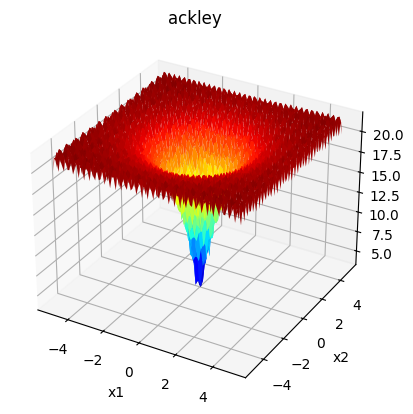

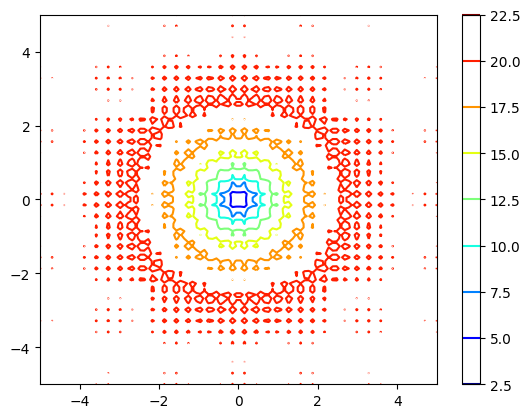

In [2]:
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = ackley # many other possible functions : cf. test_functions.py

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 

x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
axis.set_zlim(np.min(z)-0.1,np.max(z)+0.1)
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z,cmap='jet')
plt.colorbar()
plt.show()
# figure.savefig('plot.pdf')

Now carry out some optimizations.  

Some explanations about results format parameters :  

printlevel : int, controls how much is recorded during optimization.  
       &emsp; = 0 for minimum recording (best point found and its obj function value)  
       &emsp; > 0 records history of best points  
       &emsp; > 1 records the entire history of points (memory consuming)    
        
The optimization results are dictionaries with the following key-value pairs:  
       &emsp; "f_best", float : best ojective function found during the search  
       &emsp; "x_best", 1D array : best point found   
       &emsp; "stop_condition" : str describing why the search stopped  
       &emsp; "time_used" , int : time actually used by search (may be smaller than max budget)  
       &emsp; if printlevel > 0 :  
          &emsp;&emsp;  "hist_f_best", list(float) : history of best so far objective functions  
           &emsp;&emsp; "hist_time_best", list(int) : times of recordings of new best so far  
           &emsp;&emsp; "hist_x_best", 2D array : history of best so far points as a matrix, each x is a row  
        &emsp;if printlevel > 1 :  
       &emsp;&emsp; "hist_f", list(float) : all f's calculated  
       &emsp;&emsp; "hist_x", 2D array : all x's calculated  
       &emsp;&emsp; "hist_time", list(int) : times of recording of full history  



In [3]:
#########################
# function definition
fun = quadratic
dim = 2
LB = [-5] * dim
UB = [5] * dim
# np.random.seed(123) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
start_x = np.array([3,2,1,-4.5,4.6,-2,-1,4.9,0,2])
# start_x = (1+np.arange(dim))*5/dim
# start_x = np.array([2.3,4.5])
#start_x = np.random.uniform(low=LB,high=UB)

budget = 1000*(dim+1)
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming

#########################
# optimize
# res = random_opt(func=fun, LB=LB, UB=UB, budget=budget, printlevel=printlevel)
for i in range(start_x.n) : 
    res = gradient_descent(func=fun,start_x=start_x[i], LB=LB,UB=UB,budget=budget,
                        step_factor=0.01,direction_type="gradient",
                        do_linesearch=False,min_step_size=1e-11,
                        min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)

#########################
# reporting
print_rec(res=res, fun=fun, dim=dim, LB=LB, UB=UB , printlevel=printlevel, logscale = True)

AttributeError: 'numpy.ndarray' object has no attribute 'n'

### <span style="color:red">Question 1: local vs. global search</span>

Change the following features of the above code to observe the difference between local and global optimizations : 
1. Set the dimension of the problem to 2 (so as to observe points in the `x`-space), and select alternatively `ackley` and `quadratic` as objective functions 
2. Set the initial point of the search `start_x` somewhere between the bounds `LB` and `UB`
3. Compare the pure gradient descent ( `step_factor=0.01,direction_type="gradient",do_linesearch=False` ) with the random optimization. You can play with the `step_factor` and the `budget`.


### <span style="color:red">Answer 1: local vs. global search</span>
your turn

In [ ]:
# your code here



### <span style="color:red">Question 2: gradient vs. momentum vs. NAG</span>

Compare the influence of the directions gradient, momentum and NAG on a quadratic function in relatively high (50) dimensions. 


### <span style="color:red">Answer 2: gradient vs. momentum vs. NAG directions</span>
your analysis

In [ ]:
# your code here



## A first step towards ML: regularized quadratic loss

Let us consider the following test function which is associated to machine learning :

$$ f(x) = \sum_{i=1}^D (x_i - c_i)^2 + \lambda \sum_{i=1}^D \lvert x_i\rvert \quad,\quad \lambda \ge 0 $$
$$ c_i = i \quad \text{ and } \quad -5 = LB_i \le x_i \le UB_i = 5 \quad,\quad i=1,\ldots,D $$  

* First term: sphere function centered at $c$. A simplistic model to the mean square error of a NN where $x$ minimizes the training error.
* Second term: L1 norm times $\lambda$. The $x_i$'s would be the weights of a NN.
This term helps in improving the test error.

The function is already coded in `test_functions.py` as `sphereL1`. $\lambda$ is set in the function (open the file in your preferred Python editor).





Let us first plot the function in 2 dimensions:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


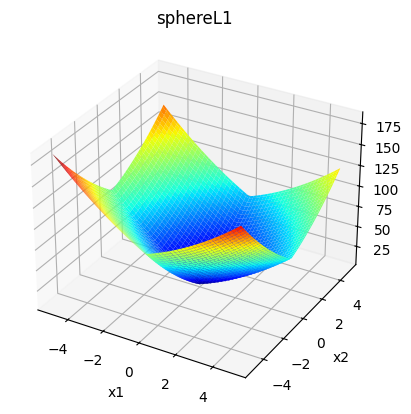

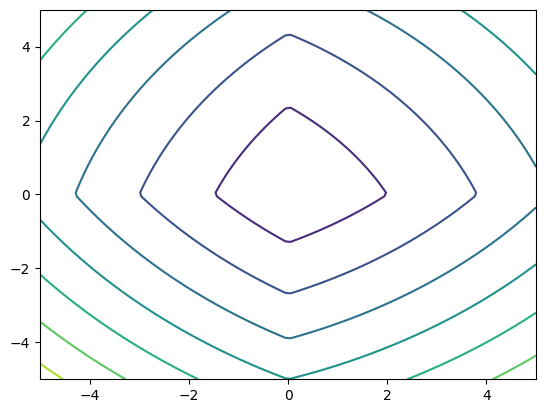

In [ ]:
%load_ext autoreload
%autoreload 2
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = sphereL1

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
# execute " %matplotlib qt5 " in the spyder console for interactive 3D plots 
# " %matplotlib inline " will get back to normal docking
x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()


### <span style="color:red">Question 3 : optimizing the `sphereL1` function</span> 

You will optimize the `sphereL1` function for various values of $\lambda$, $\lambda = \{0.001,0.1,1,5,10\}$ in `dim=10` dimensions.

To do this, make sure that the function is described as follows  
```
# function definition
fun = sphereL1
dim = 10
LB = [-5] * dim
UB = [5] * dim
```

Also, to make the results of the search more robust, use the `restarted_gradient_descent` function (cf. `restarted_gradient_descent.py` file).

Repeat optimizations for varying $\lambda$'s (parameter `lbda` dans `test_functions.sphereL1`)
3.1. What do you notice ? 
3.2. Assuming the $x$'s are weights of a neural network, what would be the effect of $\lambda$ on the network ?

Note : when changing `lbda`, it is important to restart the kernel or, to make it automatic, the following lines of code have been added at the top of the notebook.
```
%load_ext autoreload
%autoreload 2
```

### <span style="color:red">Answer 3: optimizing the `sphereL1` function</span>
your analysis

search stopped after 181235 evaluations of f because of too small step 
best objective function = 33673.23262827862
best x = [-2.69067244e-08 -2.72953764e-08 -2.15236839e-08  2.18476233e-01
  7.51710952e-03  7.04145309e-01  1.34621957e+00  3.24916980e+00
  4.00629805e+00  4.51722091e+00  4.28602023e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00]


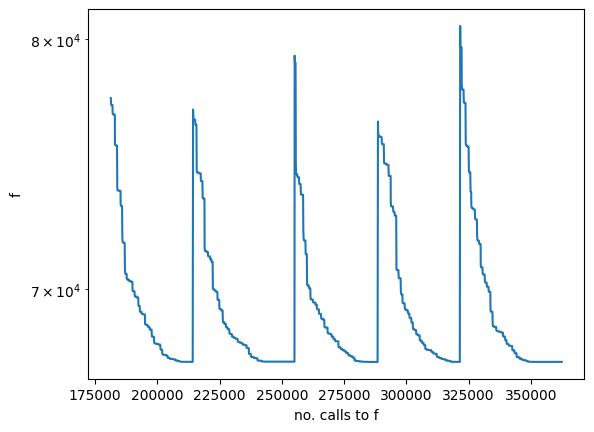

In [4]:
# function definition
fun = sphereL1
dim = 50
LB = [-5] * dim
UB = [5] * dim

lbda = 1 

# algorithms settings
start_x = np.random.uniform(low=LB,high=UB)
budget = 4000*(dim+1)
nb_restarts = 5
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming

# optimize
res = restarted_gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,nb_restarts=nb_restarts,
                       step_factor=0.1,direction_type="momentum",
                       do_linesearch=True,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)
# reporting
print(f'search stopped after {res["time_used"]} evaluations of f because of {res["stop_condition"]}')
print("best objective function =",res["f_best"])
print("best x =", res["x_best"])
if printlevel > 0:
    fig1, ax1 = plt.subplots()
    plt.yscale("log")
    ax1.plot((res["hist_time_best"]+ [res["time_used"]]) , (res["hist_f_best"] + [res["f_best"]]))
    ax1.set_xlabel("no. calls to f")
    ax1.set_ylabel("f")
    if printlevel > 1:
        ax1.plot(res["hist_time"],res["hist_f"])




## **End of this lab**